# Circuit preprocessor: equally-spaced mesh example

In [1]:
import sys,os,inspect
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))))
import fastest_lap

In [2]:
options = "<options>"
options += "    <kml_files>"
options += "        <left>../../../database/tracks/catalunya_2022/catalunya_2022_left.kml</left>"
options += "        <right>../../../database/tracks/catalunya_2022/catalunya_2022_right.kml</right>"
options += "    </kml_files>"
options += "    <mode>equally-spaced</mode>"
options += "    <is_closed>true</is_closed>"
options += "    <number_of_elements>1000</number_of_elements>"
options += "    <xml_file_name>test.xml</xml_file_name>"
options += "    <output_variables>"
options += "        <prefix>track/</prefix>"
options += "    </output_variables>"
options += "</options>"

fastest_lap.circuit_preprocessor(options)

In [3]:
def plot_turn(i_start,i_end,title):
    
    # (1) Download data
    s = fastest_lap.download_vector("track/arclength");
    x = fastest_lap.download_vector("track/centerline/x");
    y = fastest_lap.download_vector("track/centerline/y");
    x_left = fastest_lap.download_vector("track/left/x");
    y_left = fastest_lap.download_vector("track/left/y");
    x_right = fastest_lap.download_vector("track/right/x");
    y_right = fastest_lap.download_vector("track/right/y");
    x_left_measured = fastest_lap.download_vector("track/left_measured/x");
    y_left_measured = fastest_lap.download_vector("track/left_measured/y");
    x_right_measured = fastest_lap.download_vector("track/right_measured/x");
    y_right_measured = fastest_lap.download_vector("track/right_measured/y");
    kappa = fastest_lap.download_vector("track/kappa");
    nl = fastest_lap.download_vector("track/nl");
    nr = fastest_lap.download_vector("track/nr");    
    
    # (2) Generate plots
    fig = plt.figure(constrained_layout=True, figsize=(15,11))
    gs = fig.add_gridspec(ncols=2, nrows=3, height_ratios=[4,1,1])
    ax1 = fig.add_subplot(gs[0, 0])
    ax3 = fig.add_subplot(gs[0, 1])    
    ax2 = fig.add_subplot(gs[1, :])    
    ax4 = fig.add_subplot(gs[2, :])    
    
    # (2.1) Zoomed GPS
    ax1.plot(x_left[i_start:i_end],y_left[i_start:i_end],'.w',visible='off');
    ax1.plot(x_right[i_start:i_end],y_right[i_start:i_end],'.w',visible='off');
    ax1.set_aspect('equal', adjustable='datalim')
    xlim=ax1.get_xlim(); ylim=ax1.get_ylim();
    ax1.plot(x,y,'.-w');
    ax1.plot(x[i_start:i_end],y[i_start:i_end],'.-',color='yellow',visible='off');
    ax1.plot(x_left,y_left,'.w');
    ax1.plot(x_right,y_right,'.w');
    ax1.plot(x_left_measured,y_left_measured,'y'); ax1.plot(x_right_measured,y_right_measured,'y'); 
    ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax1.set_title('GPS',fontweight='bold',fontsize=32)
    
    # (2.2) Curvature
    ax2.plot(s[i_start:i_end],kappa[i_start:i_end],'.-w');
    ax2.set_title('curvature',fontweight='bold',fontsize=32)
    
    # (2.3) Full view GPS
    ax3.plot(x,y,'w')
    ax3.plot(x[i_start:i_end],y[i_start:i_end],'yellow',linewidth=5)
    ax3.set_aspect('equal', adjustable='datalim')
    
    # (2.4) Distance to boundaries
    ax4.plot(s[i_start:i_end],nl[i_start:i_end],'.-'); ax4.plot(s[i_start:i_end],nr[i_start:i_end],'.-');
    ax4.set_title('distance to boundaries',fontweight='bold',fontsize=32)
    fig.suptitle(title, fontsize=32, fontweight='bold', fontname='DejaVu Sans')

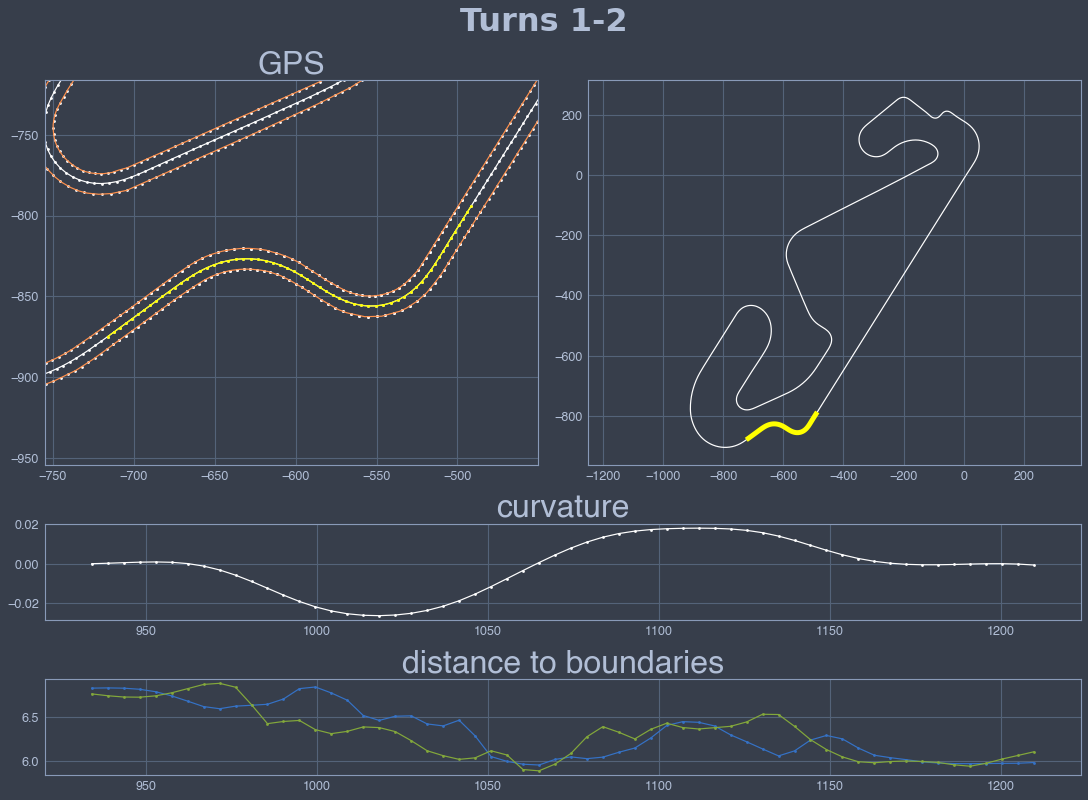

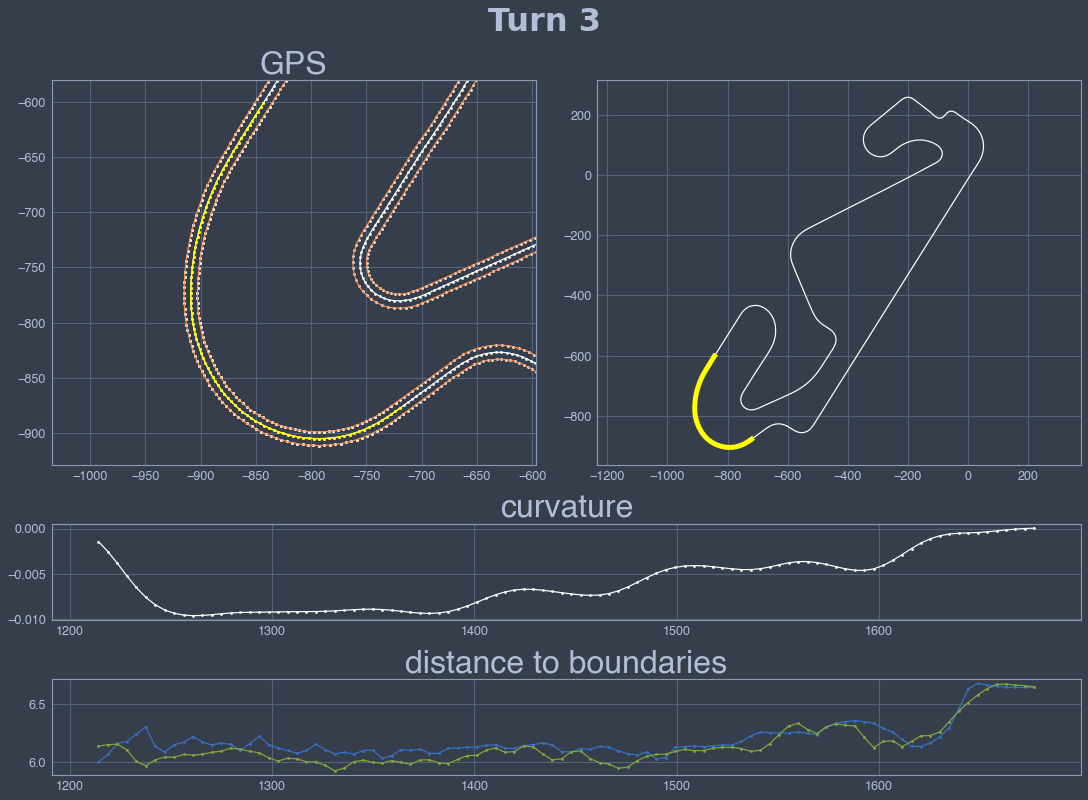

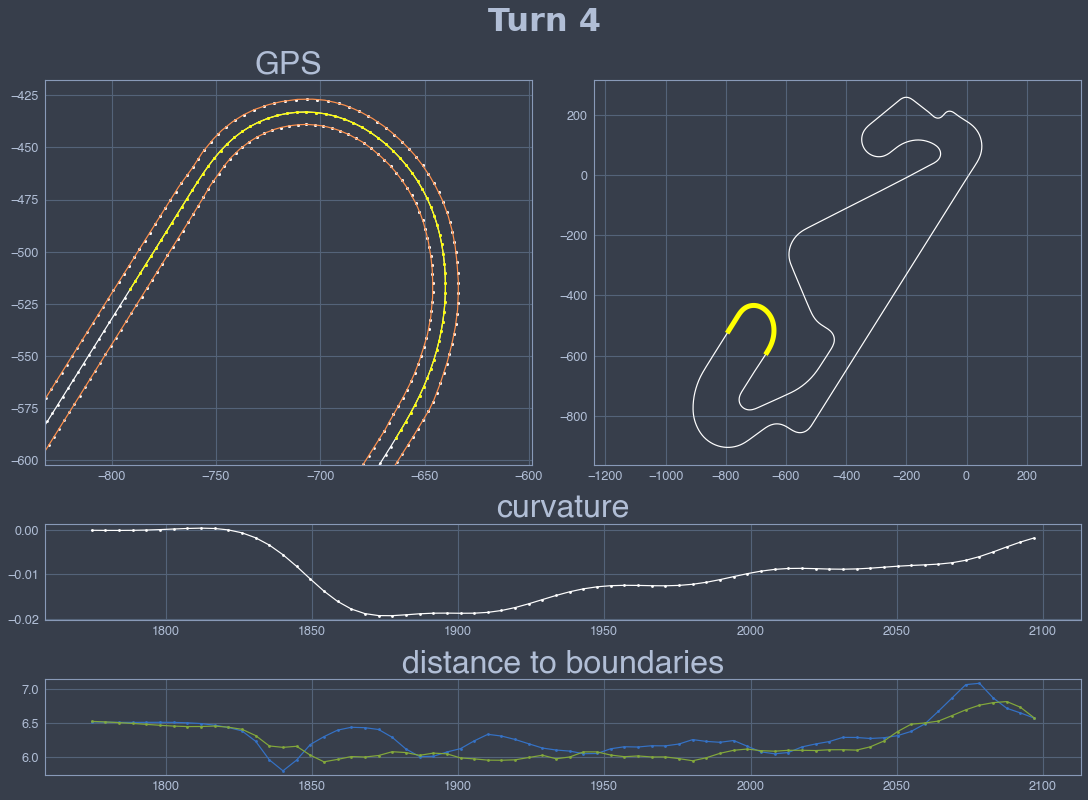

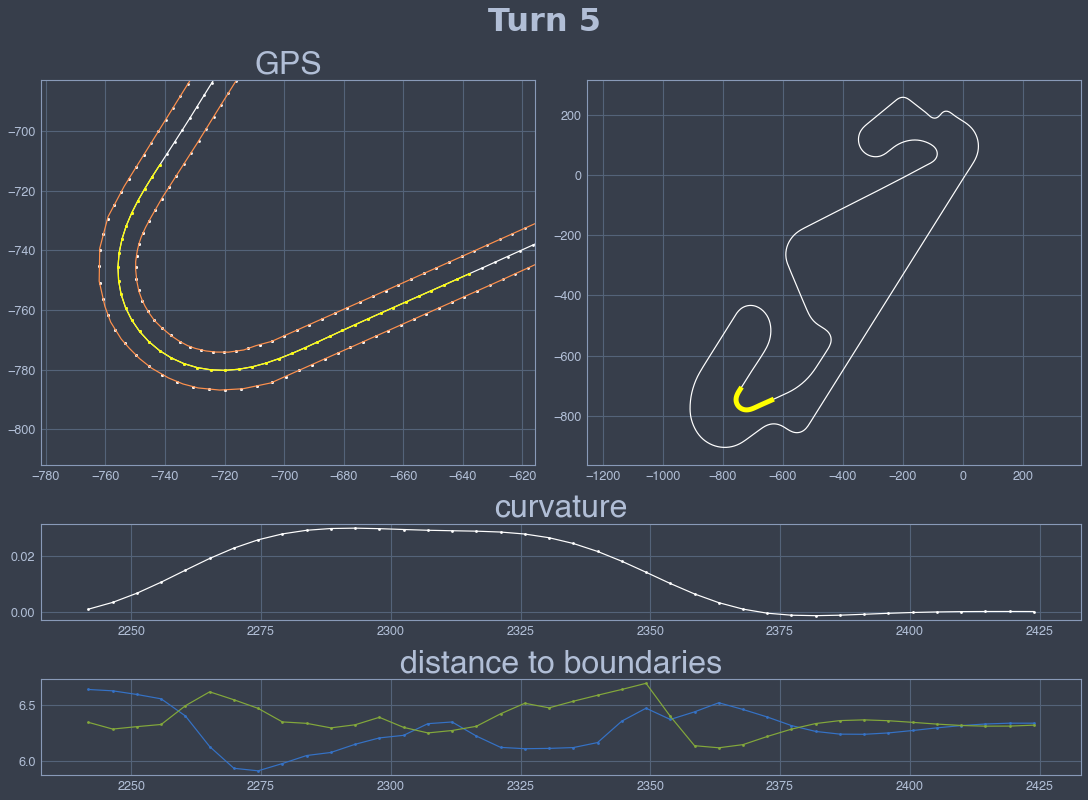

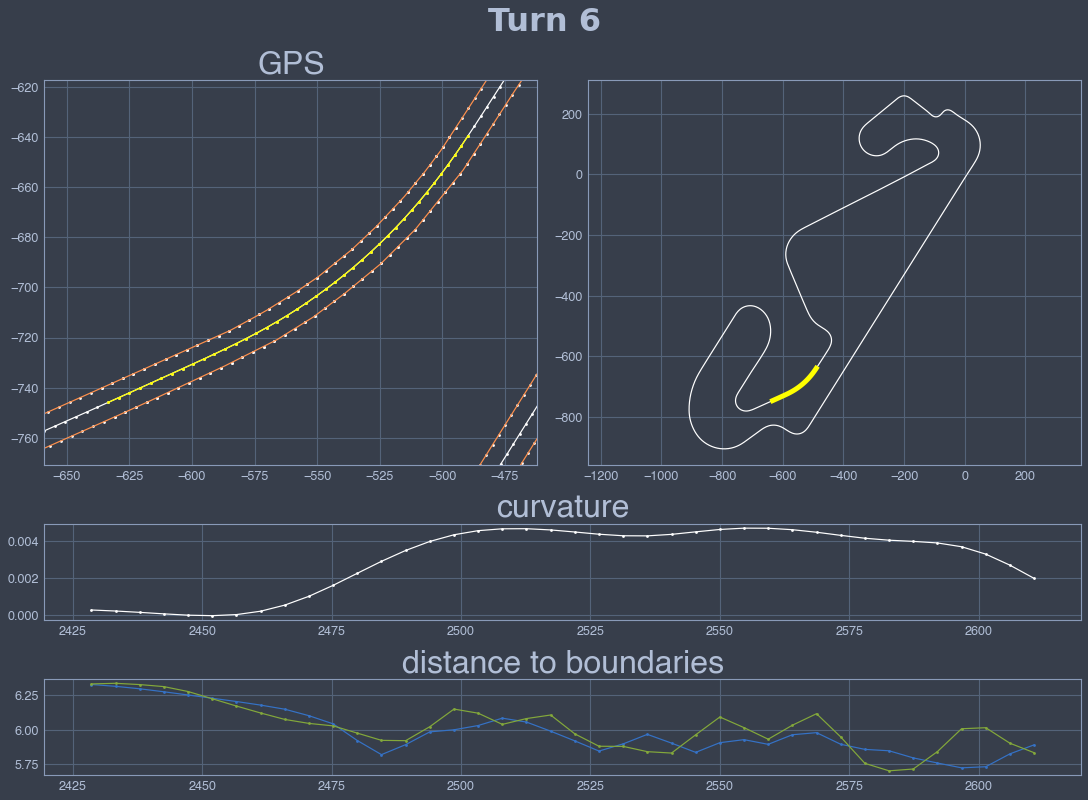

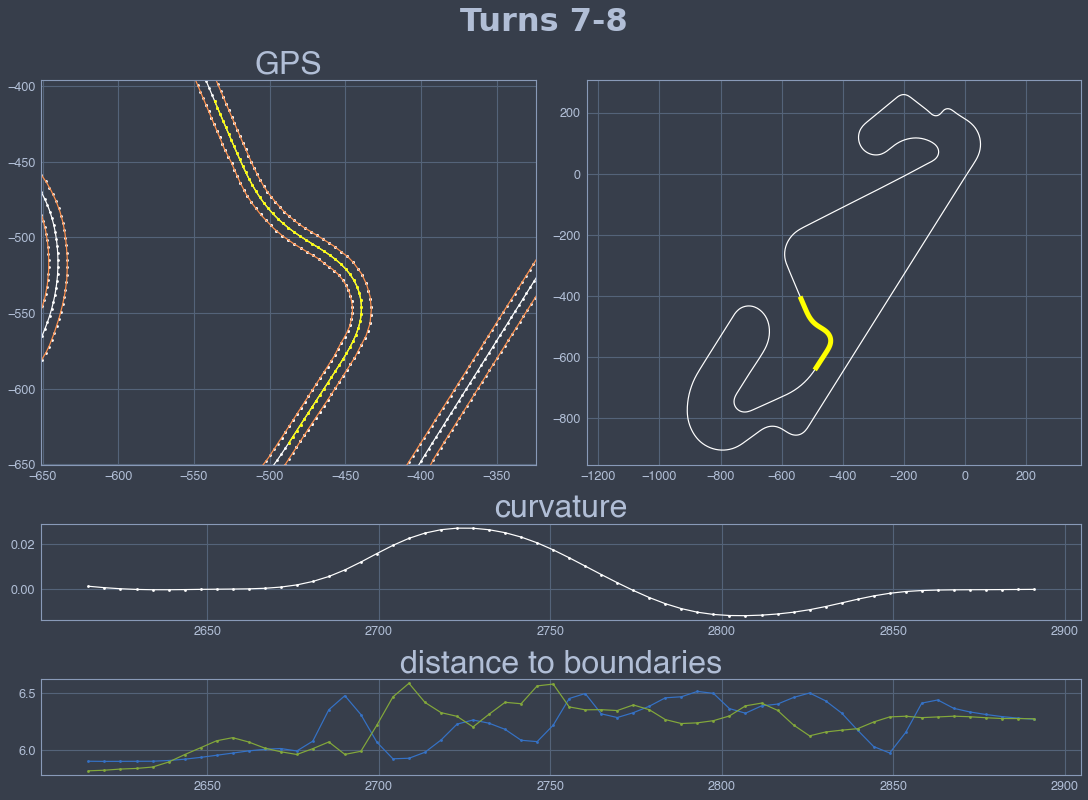

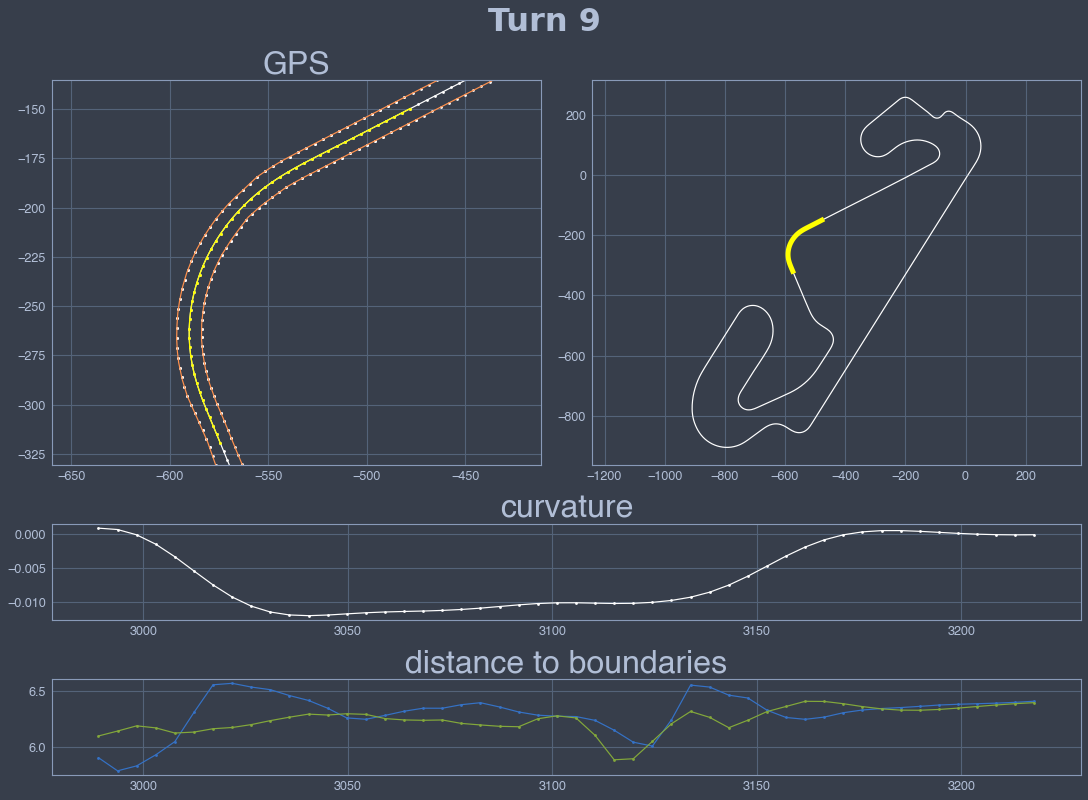

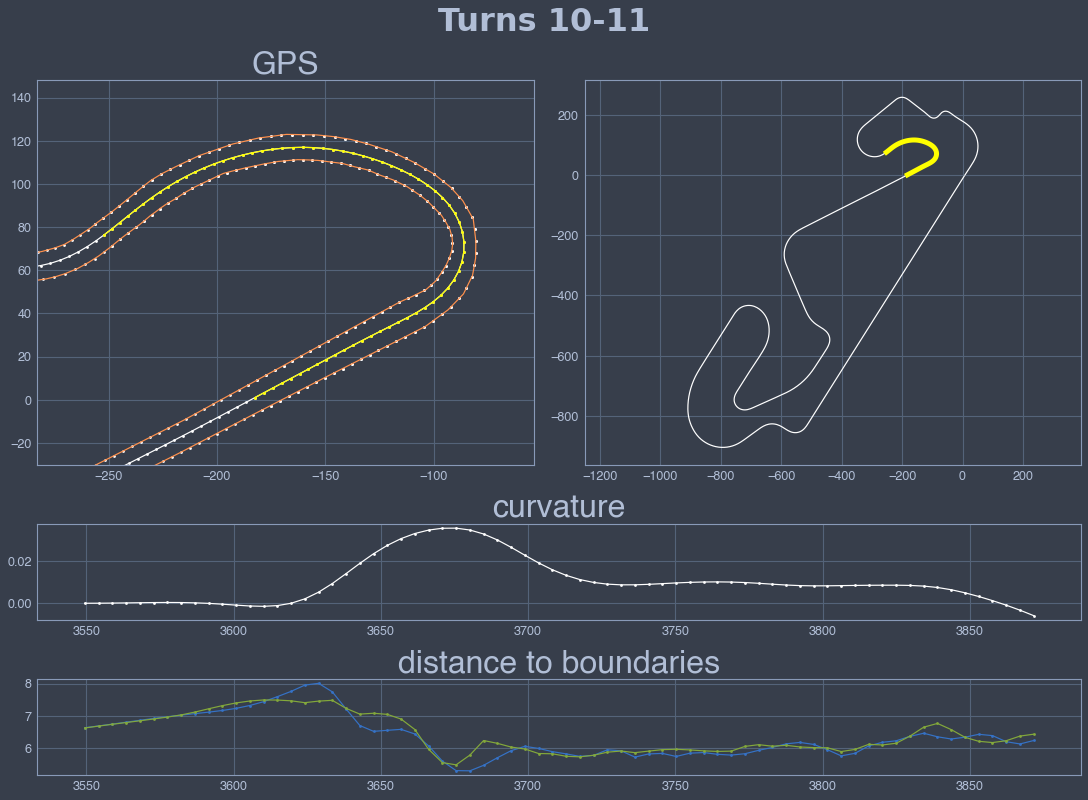

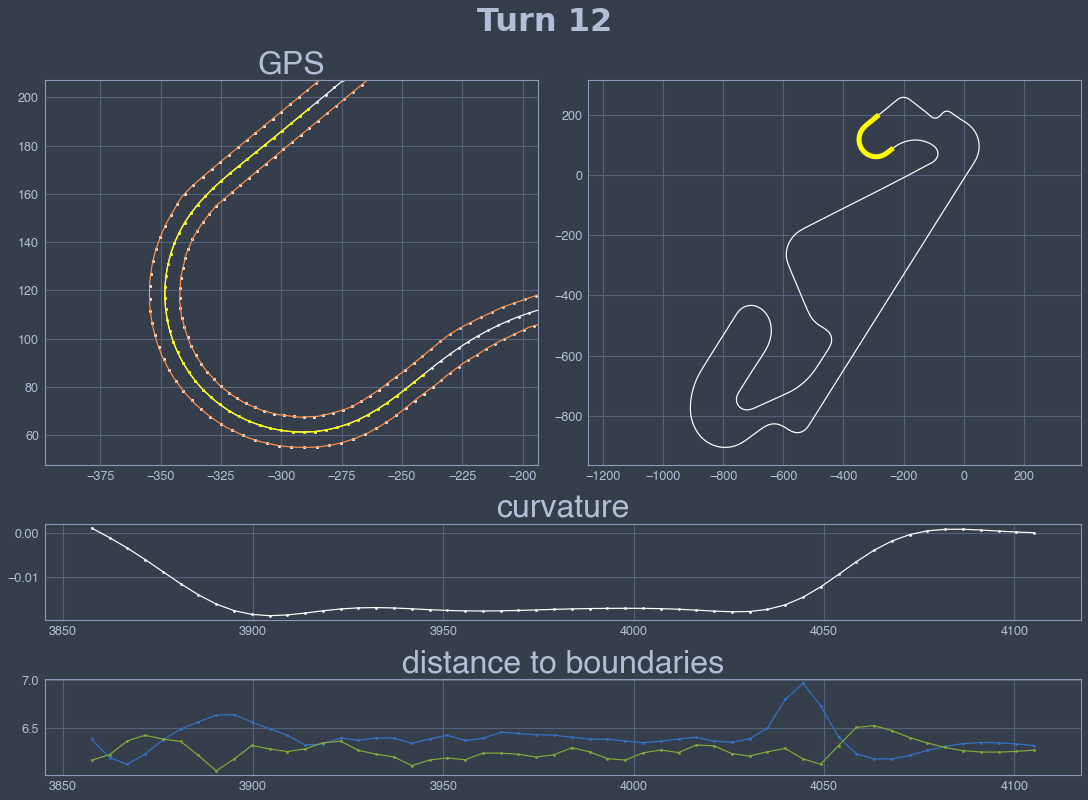

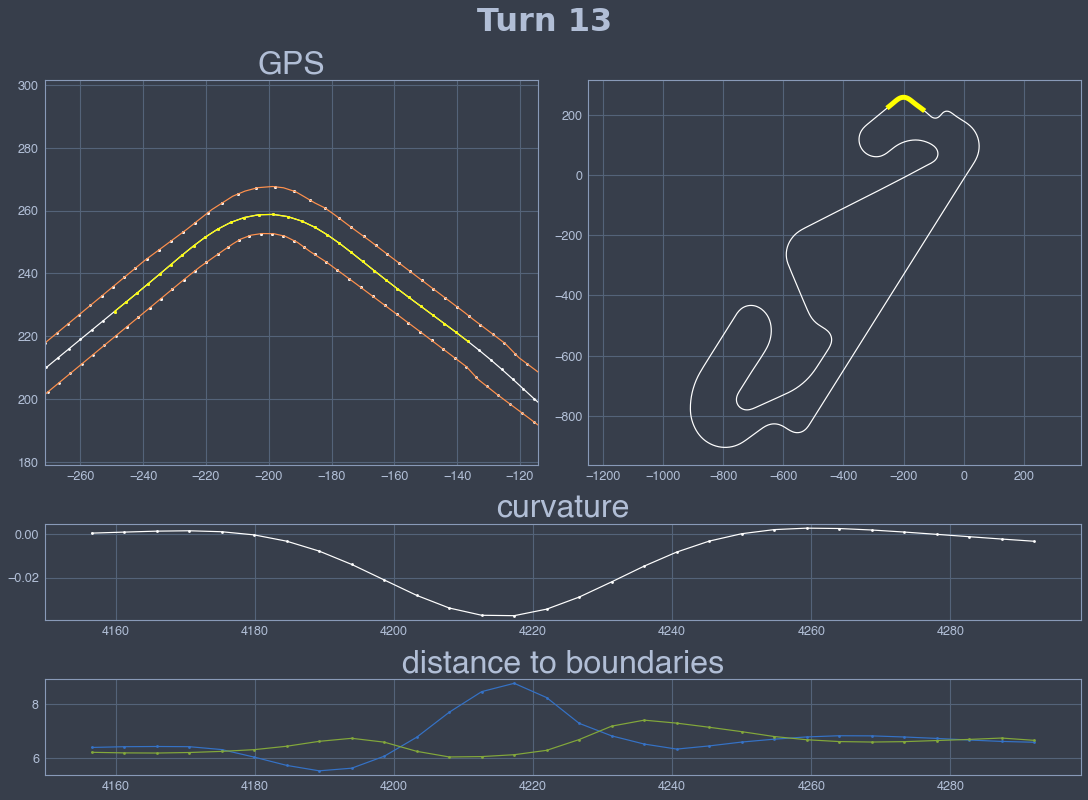

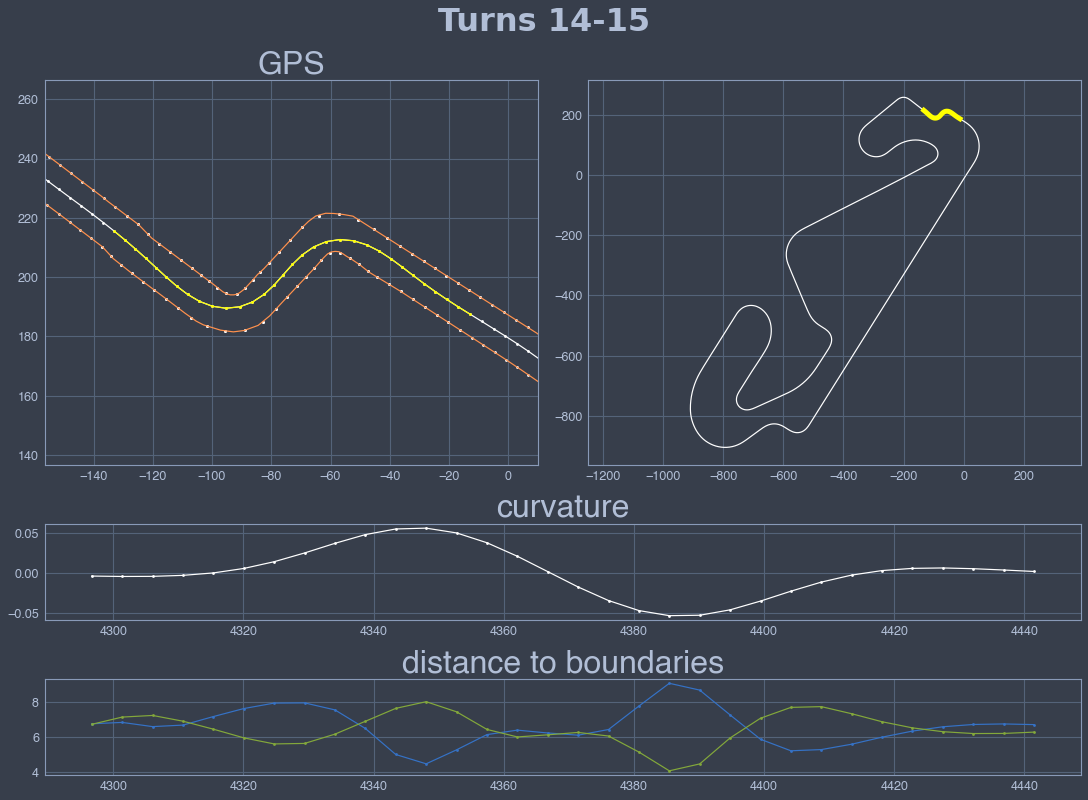

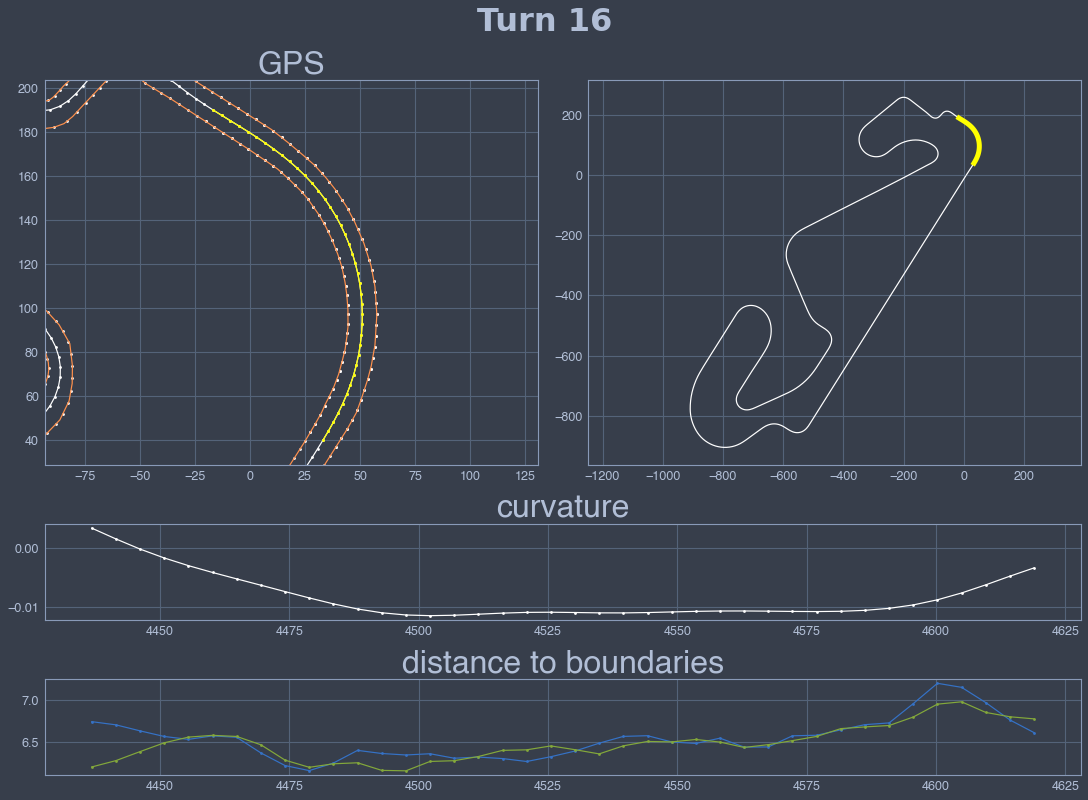

In [4]:
plot_turn(2*100,2*130,"Turns 1-2");
plot_turn(2*130,2*180,"Turn 3");
plot_turn(2*190,2*225,"Turn 4");
plot_turn(2*240,2*260,"Turn 5");
plot_turn(2*260,2*280,"Turn 6");
plot_turn(2*280,2*310,"Turns 7-8");
plot_turn(2*320,2*345,"Turn 9");
plot_turn(2*380,2*415,"Turns 10-11");
plot_turn(2*413,2*440,"Turn 12");
plot_turn(2*445,2*460,"Turn 13");
plot_turn(2*460,2*476,"Turns 14-15");
plot_turn(2*475,2*495,"Turn 16");